### 构建Beale 公式及其导数

**导入相关模块**

In [57]:
import numpy as np
import matplotlib.pyplot as plt	
import matplotlib.colors as anaplt_cl

**构建相关函数**

In [58]:
# 定义beale公式
def beale(x1,x2):
    return (1.5-x1+x1*x2)**2+(2.25-x1+x1*x2**2)**2+(2.625-x1+x1*x2**3)**2
# 定义beale公式的偏导函数
def dbeale_dx(x1, x2):
    dfdx1 = 2*(1.5-x1+x1*x2)*(x2-1)+2*(2.25-x1+x1*x2**2)*(x2**2-1)+2*(2.625-x1+x1*x2**3)*(x2**3-1)
    dfdx2 = 2*(1.5-x1+x1*x2)*x1+2*(2.25-x1+x1*x2**2)*(2*x1*x2)+2*(2.625-x1+x1*x2**3)*(3*x1*x2**2)
    return dfdx1, dfdx2 

**可视化beale方程**

目标结果 (x_1, x_2) = (3, 0.5)


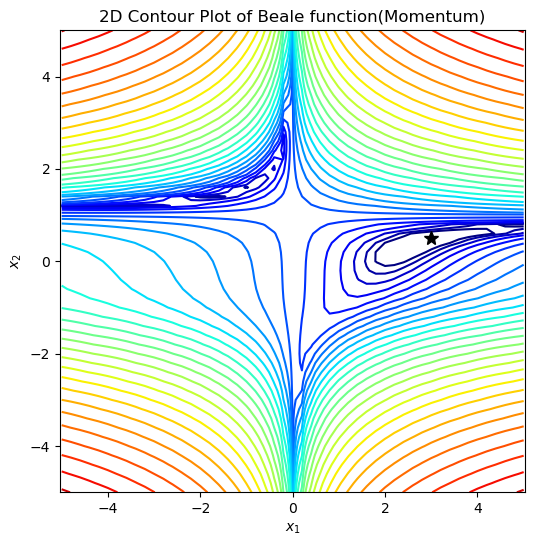

In [59]:
# 定义画图函数
def gd_plot(x_traj):
    plt.rcParams['figure.figsize'] = [6, 6]
    plt.contour(X1, X2, Y, levels=np.logspace(0, 6, 30),
                norm=anaplt_cl.LogNorm(), cmap=plt.cm.jet)
    plt.title('2D Contour Plot of Beale function(Momentum)')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.axis('equal')
    plt.plot(3, 0.5, 'k*', markersize=10)
    if x_traj is not None:
        x_traj = np.array(x_traj)
        plt.plot(x_traj[:, 0], x_traj[:, 1], 'k-')
    plt.show()

step_x1, step_x2 = 0.2, 0.2
X1, X2 = np.meshgrid(np.arange(-5, 5 + step_x1, step_x1),
                     np.arange(-5, 5 + step_x2, step_x2))
Y = beale(X1, X2)
print("目标结果 (x_1, x_2) = (3, 0.5)")
gd_plot(None)


### 编写不使用优化器优化Beale 公式

**构建无优化器函数**

In [60]:
# 定义无优化器函数
def gd_no(df_dx, x0, conf_para=None):
    if conf_para is None:
        conf_para = {}
    conf_para.setdefault('n_iter', 1000)  # 迭代次数
    conf_para.setdefault('learning_rate', 0.001)  # 设置学习率
    x_traj = []
    x_traj.append(x0)
    v = np.zeros_like(x0)
# 没有迭代更新的操作，所以，坐标没有变化
    for iter in range(1, conf_para['n_iter'] + 1):
        x_traj.append(x_traj[-1])
    return x_traj 


**优化beale方程**

无优化器求得极值点 (x_1, x_2) = (1.0, 1.5)


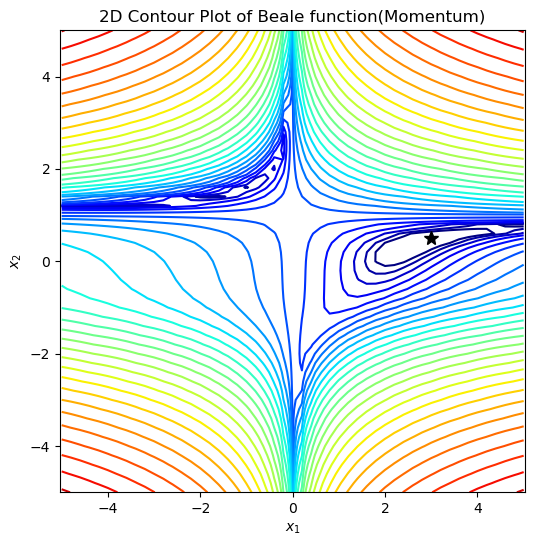

In [61]:
# 初始化坐标
x0 = np.array([1.0, 1.5])
conf_para_no = {'n_iter': 2000, 'learning_rate': 0.005}
# 调用函数进行更新
x_traj_no = gd_no(dbeale_dx, x0, conf_para_no)
print("无优化器求得极值点 (x_1, x_2) = (%s, %s)" % (x_traj_no[-1][0], x_traj_no[-1][1]))
gd_plot(x_traj_no) 


### 编写SGD优化器并优化Beale 公式

**构建SGD优化器**

In [62]:
def gd_sgd(df_dx, x0, conf_para=None):
    if conf_para is None:
        conf_para = {}
    conf_para.setdefault('n_iter', 1000)  # 迭代次数
    conf_para.setdefault('learning_rate', 0.001)  # 设置学习率
    x_traj = []
    x_traj.append(x0)
    v = np.zeros_like(x0)
# 利用梯度值对坐标进行更新
    for iter in range(1, conf_para['n_iter'] + 1):
        dfdx = np.array(df_dx(x_traj[-1][0], x_traj[-1][1]))
        v = - conf_para['learning_rate'] * dfdx
        x_traj.append(x_traj[-1] + v)
    return x_traj


**优化beale方程**

SGD求得极值点 (x_1, x_2) = (2.981957257903412, 0.4954609564102124)


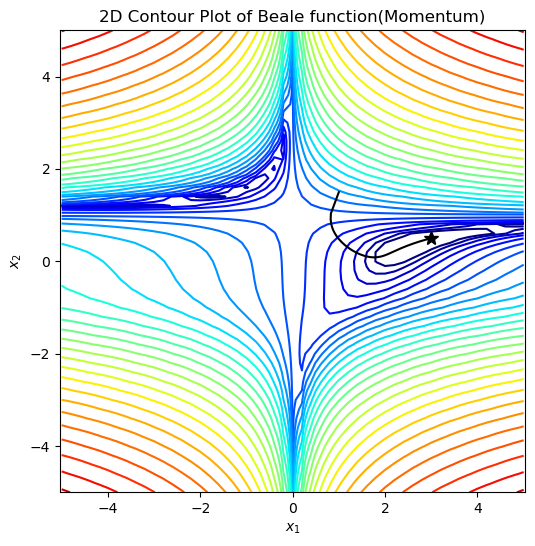

In [63]:
x0 = np.array([1.0, 1.5])
conf_para_sgd = {'n_iter': 2000, 'learning_rate': 0.005}
x_traj_sgd = gd_sgd(dbeale_dx, x0, conf_para_sgd)
print("SGD求得极值点 (x_1, x_2) = (%s, %s)" % (x_traj_sgd[-1][0], x_traj_sgd[-1][1]))
gd_plot(x_traj_sgd) 

### 编写动量优化器并优化Beale 公式

**构建Momentum优化器**

In [64]:
def gd_momentum(df_dx, x0, conf_para=None):
    if conf_para is None:
        conf_para = {}
    conf_para.setdefault('n_iter', 1000)  # 迭代次数
    conf_para.setdefault('learning_rate', 0.001)  # 设置学习率
    conf_para.setdefault('momentum', 0.9)  # 设置动量参数
    x_traj = []
    x_traj.append(x0)
    v = np.zeros_like(x0)
# 套用动量优化器公式，对坐标值进行更新
    for iter in range(1, conf_para['n_iter'] + 1):
        dfdx = np.array(df_dx(x_traj[-1][0], x_traj[-1][1]))
        v = conf_para['momentum'] * v - conf_para['learning_rate'] * dfdx
        x_traj.append(x_traj[-1] + v)
    return x_traj 

**优化beale方程**

Momentum求得极值点 (x_1, x_2) = (3.0004236971560485, 0.5001057348328146)


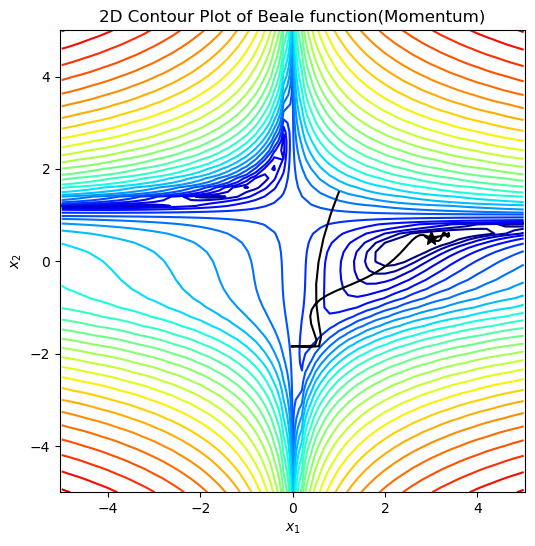

In [65]:
x0 = np.array([1.0, 1.5])
conf_para_momentum = {'n_iter': 500, 'learning_rate': 0.005}
x_traj_momentum = gd_momentum(dbeale_dx, x0, conf_para_momentum)
print("Momentum求得极值点 (x_1, x_2) = (%s, %s)" % (x_traj_momentum[-1][0], x_traj_momentum[-1][1]))
gd_plot(x_traj_momentum) 


### 编写自适应优化器并优化Beale 公式

**编写adagrad优化器**

In [66]:
def gd_adagrad(df_dx, x0, conf_para=None):
    if conf_para is None:
        conf_para = {}
    conf_para.setdefault('n_iter', 1000)  # 迭代次数
    conf_para.setdefault('learning_rate', 0.001)  # 学习率
    conf_para.setdefault('epsilon', 1e-7)
    x_traj = []
    x_traj.append(x0)
    r = np.zeros_like(x0)
   # 套用adagrad优化器公式，对参数进行更新
    for iter in range(1, conf_para['n_iter'] + 1):
        dfdx = np.array(df_dx(x_traj[-1][0], x_traj[-1][1]))
        r += dfdx ** 2
        x_traj.append(x_traj[-1] - conf_para['learning_rate'] / (np.sqrt(r) + conf_para['epsilon']) * dfdx)
    return x_traj 


**优化beale方程**

Adagrad求得极值点 (x_1, x_2) = (2.9993173156940776, 0.49982846432011524)


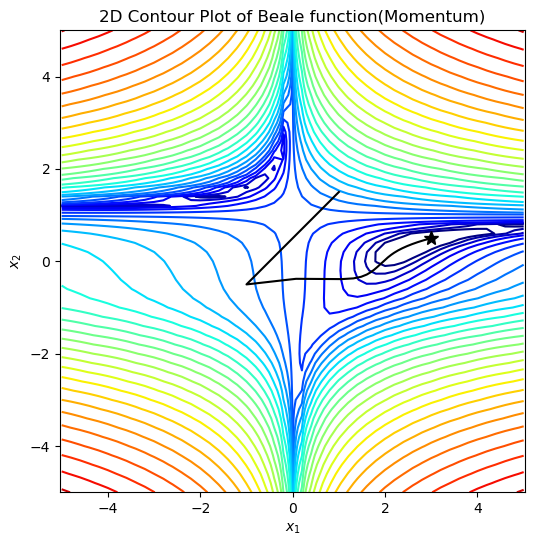

In [67]:
x0 = np.array([1.0, 1.5])
conf_para_adag = {'n_iter': 500, 'learning_rate': 2}
x_traj_adag = gd_adagrad(dbeale_dx, x0, conf_para_adag)
print("Adagrad求得极值点 (x_1, x_2) = (%s, %s)" % (x_traj_adag[-1][0], x_traj_adag[-1][1]))
gd_plot(x_traj_adag) 


### 导入模块、读取鸢尾花数据集并预处理、构建神经网络

**导入模块和定义变量**

In [69]:
import csv
import os
import time

import numpy as np
from easydict import EasyDict as edict
from matplotlib import pyplot as plt

import mindspore
from mindspore import nn
from mindspore import context
from mindspore import dataset
from mindspore.train.callback import TimeMonitor, LossMonitor
from mindspore import Tensor
from mindspore.train import Model
from mindspore.train.callback import ModelCheckpoint, CheckpointConfig

# context.set_context(mode=context.GRAPH_MODE, device_target="Ascend")
# 设定运行模式为静态图模式，并且运行设备为昇腾芯片

# 变量定义
cfg = edict({
    'data_size': 150,
    'train_size': 120,      # 训练集大小
    'test_size': 30 ,       # 测试集大小
    'feature_number': 4,       # 输入特征数
    'num_class': 3,     # 分类类别
    'batch_size': 30,
    'data_dir':    './iris.data',                     
    'save_checkpoint_steps': 5,                 # 多少步保存一次模型
    'keep_checkpoint_max': 1,                      # 最多保存多少个模型
    'out_dir_no_opt':   './model_iris/no_opt',          # 保存模型路径，无优化器模型
    'out_dir_sgd':   './model_iris/sgd',          # 保存模型路径,SGD优化器模型
    'out_dir_momentum':   './model_iris/momentum',          # 保存模型路径，momentum模型
    'out_dir_adam':   './model_iris/adam',          # 保存模型路径，adam优化器模型
    'output_prefix': "checkpoint_fashion_forward"     # 保存模型文件名
})


**读取数据并预处理**

In [71]:
# 读取鸢尾花数据集，本数据集共有150个带标签的数据
with open(cfg.data_dir) as csv_file:
    list(csv.reader(csv_file, delimiter=','))

# 共150条数据，将数据集的4个属性作为自变量X。将数据集的3个类别映射为{0, 1，2}，作为因变量Y
label_map = {'setosa': 0,'versicolor': 1,'virginica':2 }
# 分别获取数据中的特征值X和标签值Y
X = np.array([[float(x) for x in s[:-1]] for s in data[:cfg.data_size]], np.float32)
Y = np.array([label_map[s[-1]] for s in data[:cfg.data_size]], np.int32)

# 将数据集分为训练集120条，测试集30条。
train_idx = np.random.choice(cfg.data_size, cfg.train_size, replace=False)
test_idx = np.array(list(set(range(cfg.data_size)) - set(train_idx)))
X_train, Y_train = X[train_idx], Y[train_idx]
X_test, Y_test = X[test_idx], Y[test_idx]

# 使用MindSpore GeneratorDataset接口将numpy.ndarray类型的数据转换为Dataset
def gen_data(X_train, Y_train, epoch_size):
    # 生成训练集
    XY_train = list(zip(X_train, Y_train))
    ds_train = dataset.GeneratorDataset(XY_train, ['x', 'y'])
    # 设定数据集大小
    # 打乱操作并设定batchsize
    ds_train = ds_train.shuffle(buffer_size=cfg.train_size).batch(cfg.batch_size, drop_remainder=True)
    # 生成测试集
    XY_test = list(zip(X_test, Y_test))
    ds_test = dataset.GeneratorDataset(XY_test, ['x', 'y'])
    # 设定数据集大小
    # 打乱操作并设定batchsize
    ds_test = ds_test.shuffle(buffer_size=cfg.test_size).batch(cfg.test_size, drop_remainder=True)
    return ds_train, ds_test 


FileNotFoundError: [Errno 2] No such file or directory: './iris.data'

**定义训练、评估、测试函数**

In [ ]:
# 训练函数
def train(network, net_opt, ds_train, prefix, directory, print_times):
    # 定义网络损失函数
    net_loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction="mean")
    # 定义模型
    model = Model(network, loss_fn=net_loss, optimizer=net_opt, metrics={"acc"})
    # 定义损失值指标
    loss_cb = LossMonitor(per_print_times=int(cfg.train_size / cfg.batch_size))
    # 设置checkpoint
    config_ck = CheckpointConfig(save_checkpoint_steps=cfg.save_checkpoint_steps,
                                 keep_checkpoint_max=cfg.keep_checkpoint_max)
    ckpoint_cb = ModelCheckpoint(prefix=prefix, directory=directory, config=config_ck)
    print("============== Starting Training ==============")
    # 训练模型
    model.train(epoch_size, ds_train, callbacks=[ckpoint_cb, loss_cb], dataset_sink_mode=False)
    return model

class_names=['setosa', 'versicolor', 'virginica']
# 评估预测函数
def eval_predict(model, ds_test):
    # 使用测试集评估模型，打印总体准确率
    metric = model.eval(ds_test)
    print(metric)
    # 预测
    test_ = ds_test.create_dict_iterator().__next__()
    test = Tensor(test_['x'], mindspore.float32)
    predictions = model.predict(test)
    predictions = predictions.asnumpy()
    true_label = test_['y'].asnumpy()
    for i in range(10):
        p_np = predictions[i, :]
        pre_label = np.argmax(p_np)
        print('第' + str(i) + '个sample预测结果：', class_names[pre_label], '   真实结果：', class_names[true_label[i]]) 


### 无优化器模型训练并预测

In [ ]:
epoch_size = 20   # 训练20次
print('------------------无优化器--------------------------')
# 数据
ds_train, ds_test = gen_data(X_train, Y_train, epoch_size)  # 生成训练集和测试集
# 定义网络并训练
network = nn.Dense(cfg.feature_number, cfg.num_class)  # 定义一个全连接网络层，输入特征为4，输出类别为3
model = train(network, None, ds_train, "checkpoint_no_opt", cfg.out_dir_no_opt, print_times=4)  # 用训练集训练网络，设置网络结构，模型名称，保存路径, print_times
# 评估预测
eval_predict(model, ds_test)  # 用测试集进行预测
